In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries and loading my dataset.

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


data_dir = '/content/drive/MyDrive/flowers'


In [59]:
# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255) # Rescale pixel values to 0-1

In [60]:
# Load the dataset
image_size = (128, 128)
batch_size = 32
# one can adjust the image size and batch size

In [61]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2746 images belonging to 5 classes.


In [62]:
# Number of images
num_images = train_generator.samples
print(f"Number of images: {num_images}")

Number of images: 2746


In [63]:
# Number of classes
num_classes = train_generator.num_classes
print(f"Number of classes: {num_classes}")


Number of classes: 5


In [64]:
# Class names (labels)
class_names = list(train_generator.class_indices.keys())
print(f"Class names: {class_names}")

Class names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


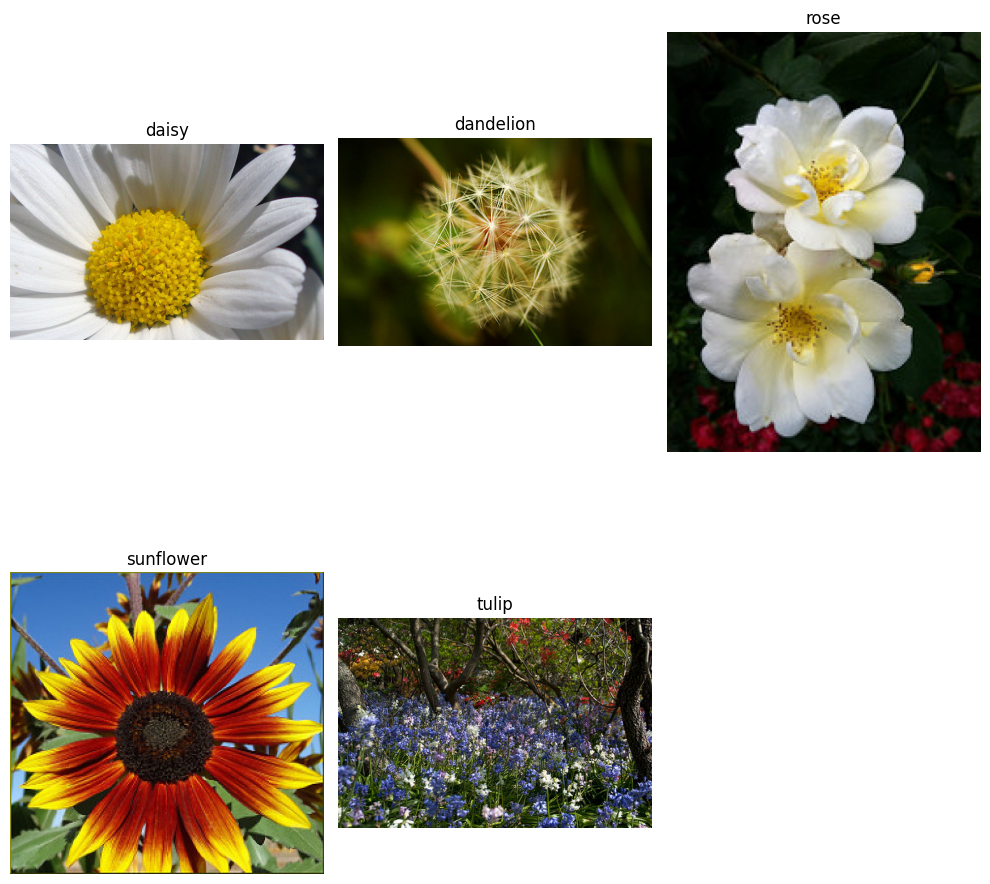

In [65]:
#Iterate through classes and display a sample image
class_names = os.listdir(data_dir)
plt.figure(figsize=(10, 10))

for i, class_name in enumerate(class_names):
  class_path = os.path.join(data_dir, class_name)
  # Get the first image file in the class directory
  image_files = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

  if image_files:
      sample_image_path = os.path.join(class_path, image_files[0])
      img = mpimg.imread(sample_image_path)

      plt.subplot(len(class_names) // 3 + 1, 3, i + 1)
      plt.imshow(img)
      plt.title(class_name)
      plt.axis('off')

plt.tight_layout()
plt.show()

Train and Validation

In [66]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,      # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20%
    height_shift_range=0.2, # Shift images vertically by up to 20%
    shear_range=0.2,        # Apply shearing transformations
    zoom_range=0.2,         # Apply zooming
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill in newly created pixels
)
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) # Use the same split

In [67]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 2198 images belonging to 5 classes.


In [68]:
validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation' # Specify validation subset
)

Found 548 images belonging to 5 classes.


Normalizing the pixel values to the rang of 0 - 1

In [69]:
import numpy as np

image_array = np.random.randint(0, 256, size=(100, 100, 3), dtype=np.uint8)
# Convert to float type and normalize
normalized_image_array = image_array.astype('float32') / 255.0

# Verify the range (optional)
print(f"Original image data type: {image_array.dtype}")
print(f"Normalized image data type: {normalized_image_array.dtype}")
print(f"Min pixel value after normalization: {normalized_image_array.min()}")
print(f"Max pixel value after normalization: {normalized_image_array.max()}")

Original image data type: uint8
Normalized image data type: float32
Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0


Importing TensorFlow and Building a CNN Model

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [71]:
from tensorflow.keras import models, layers

input_shape = (image_size[0], image_size[1], 3)
num_classes = 5

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening
model.add(layers.Flatten())
# Dense layer
model.add(layers.Dense(128, activation='relu'))
# Softmax is used for multi class classfication and our dataset is one
model.add(layers.Dense(num_classes, activation='softmax'))

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,965 (28.20 MB)

 Trainable params: 7,392,965 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Training.

In [72]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])

Epochs represent the number of times the entire training dataset passed through the model.

In [73]:
from keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the EarlyStopping callback
history = model.fit(train_generator,
                    epochs=50, # Set a reasonable maximum number of epochs
                    validation_data=validation_generator, # Use validation_data with the generator
                    callbacks=[early_stopping])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.2774 - loss: 2.1678 - val_accuracy: 0.3869 - val_loss: 1.3566
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.4754 - loss: 1.2359 - val_accuracy: 0.4726 - val_loss: 1.3714
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5553 - loss: 1.0959 - val_accuracy: 0.5931 - val_loss: 1.0789
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.6151 - loss: 0.9657 - val_accuracy: 0.5712 - val_loss: 1.1255
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6443 - loss: 0.9747 - val_accuracy: 0.6040 - val_loss: 1.0498
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6485 - loss: 0.9281 - val_accuracy: 0.6168 - val_loss: 1.1063
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6583 - loss: 0.8547 - val_accuracy: 0.6332 - val_loss: 0.9486
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.6910 - loss: 0.8045 - val_accuracy: 0.6478 - val_loss

Visualization.

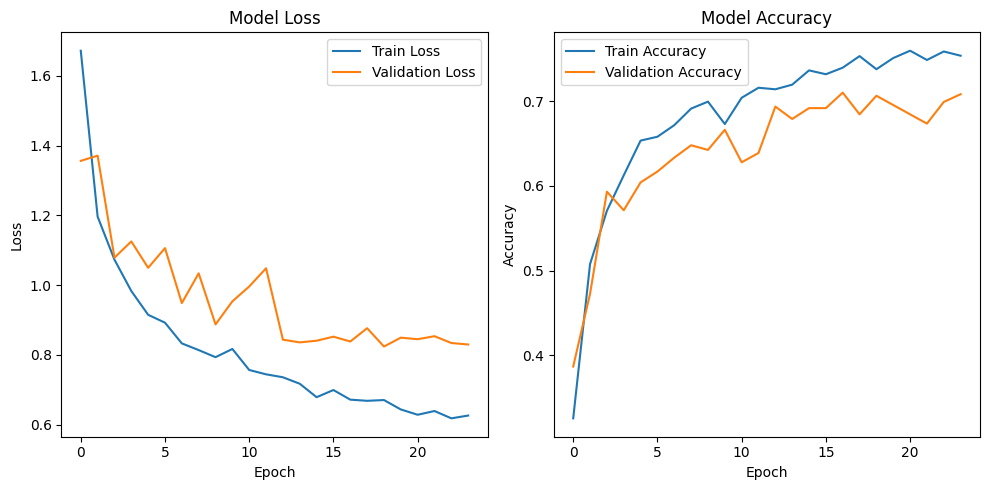

In [74]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

Evaluation.

In [75]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator)

# Print the loss and accuracy
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 406ms/step - accuracy: 0.7006 - loss: 0.8641
Validation Loss: 0.8240
Validation Accuracy: 0.7062


In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Reset the validation generator to ensure predictions are in the correct order
validation_generator.reset()

# Get predictions from the model for the validation set
predictions = model.predict(validation_generator, steps=len(validation_generator))

# Get the true labels for the validation set
true_labels = validation_generator.classes

# Convert predictions to class indices
predicted_labels = np.argmax(predictions, axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 300ms/step


Correlation Matrix

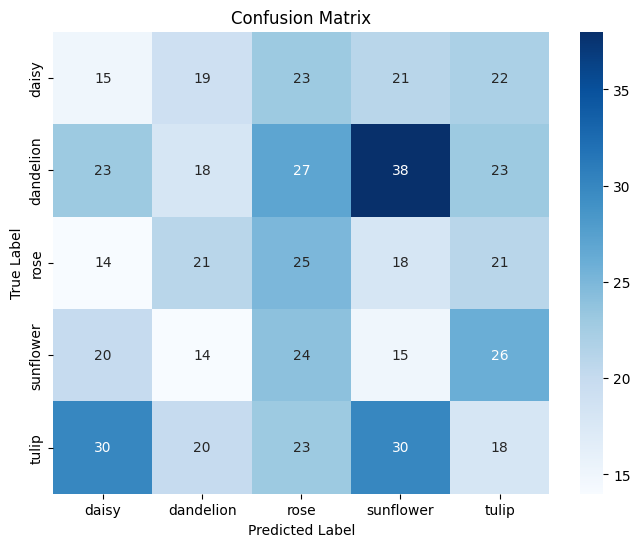

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

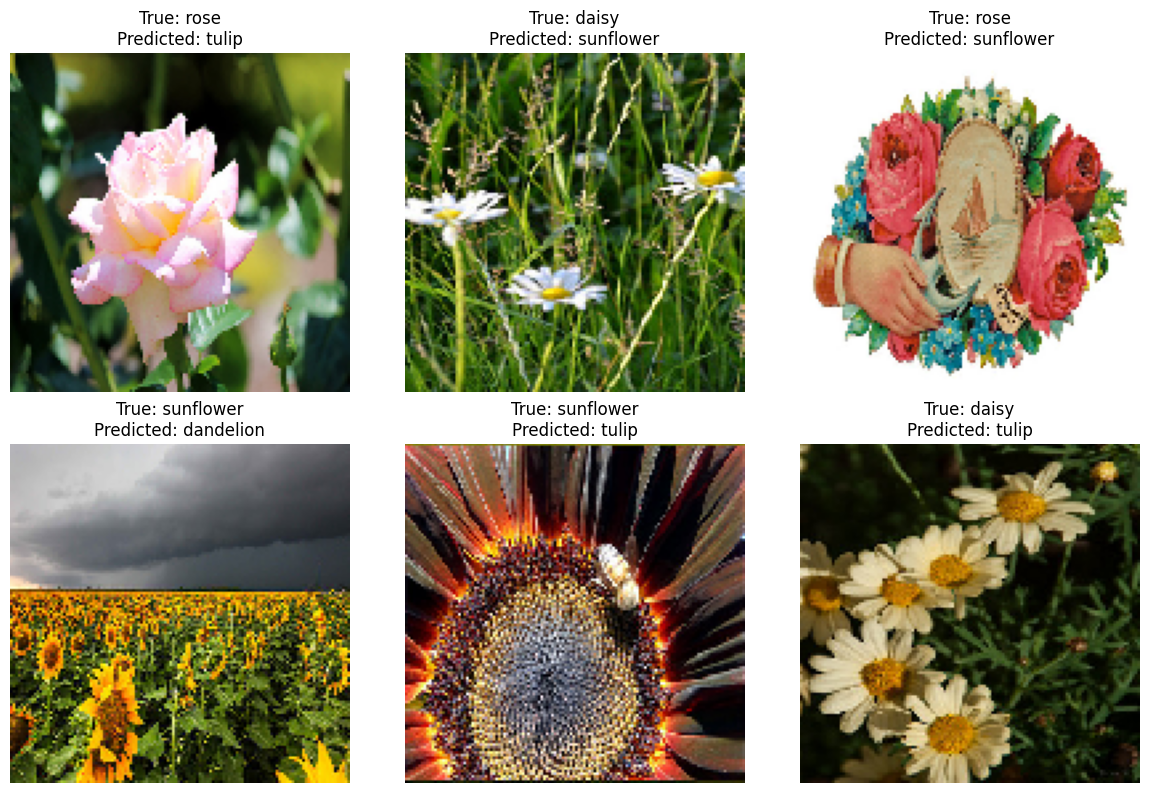

In [78]:
plt.figure(figsize=(12, 8))
for i in range(6):
    # Get the image and label from the validation generator
    img, label = validation_generator[0][0][i], validation_generator[0][1][i]

    global_index = i

    true_class_index = np.argmax(label)
    predicted_class_index = predicted_labels[global_index]

    true_label = class_names[true_class_index]
    predicted_label = class_names[predicted_class_index]

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Summary of the model performance.

In [82]:
print("Model Performance Summary:")
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

print("\nAnalysis of Confusion Matrix:")
print(f"Class names: {class_names}")
print("Confusion Matrix:")
print(cm)


print("\nStrengths (Classes with high correct predictions):")
for i in range(len(class_names)):
    print(f"- {class_names[i]}: {cm[i, i]} correct predictions")

print("\nWeaknesses (Classes with significant confusion):")
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm[i, j] > 0:
            print(f"- True: {class_names[i]}, Predicted: {class_names[j]}: {cm[i, j]} misclassifications")


Model Performance Summary:
Validation Loss: 0.8240
Validation Accuracy: 0.7062

Analysis of Confusion Matrix:
Class names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
Confusion Matrix:
[[15 19 23 21 22]
 [23 18 27 38 23]
 [14 21 25 18 21]
 [20 14 24 15 26]
 [30 20 23 30 18]]

Strengths (Classes with high correct predictions):
- daisy: 15 correct predictions
- dandelion: 18 correct predictions
- rose: 25 correct predictions
- sunflower: 15 correct predictions
- tulip: 18 correct predictions

Weaknesses (Classes with significant confusion):
- True: daisy, Predicted: dandelion: 19 misclassifications
- True: daisy, Predicted: rose: 23 misclassifications
- True: daisy, Predicted: sunflower: 21 misclassifications
- True: daisy, Predicted: tulip: 22 misclassifications
- True: dandelion, Predicted: daisy: 23 misclassifications
- True: dandelion, Predicted: rose: 27 misclassifications
- True: dandelion, Predicted: sunflower: 38 misclassifications
- True: dandelion, Predicted: tulip: 23

Overall Performance


In [81]:
print(f"The model achieved a validation accuracy of {accuracy:.4f}. While this indicates the model can correctly classify a little over half of the validation images, there is significant room for improvement.")


The model achieved a validation accuracy of 0.7062. While this indicates the model can correctly classify a little over half of the validation images, there is significant room for improvement.


The confusion matrix reveals that the model performs relatively well on some classes e.g Rose have a higher number of correct predictions but struggles with others.

There are notable confusions between certain classes, as indicated by the off-diagonal values in the confusion matrix. For instance, some images of one flower type are frequently misclassified as another. This suggests that the model may not be effectively learning the distinct features that differentiate these confused classes.

Further improvements could involve data augmentation, using a more complex model architecture, or fine-tuning a pre-trained model.